# Decision Trees and Random Forest


### Decision Trees

Decison trees are supervised learning method able to handle non linearly separable data. The tree is built based on the training set. At each node, the algorithm chooses a splitting rule (based on a feature) that optimizes a certain criterion previously given (e.g. Gini index, entropy). 

The objective of the algorithm is to find the simplest possible decison tree (i.e. only a few nodes = a small depth) with high predictive quality (e.g. high accuracy). 


### Background
#### Intuition <a id = "DT-Intuition"></a>

Decision trees, as the name goes, use a tree-like model of decisions. At each node, the algorithm chooses a splitting rule (based on a feature) that maximizes the accuracy of the model. More precisely, at every split the algorithm maximizes a certain criterion previously given (e.g., Gini index, information gain).

The objective of the algorithm is to find the simplest possible decision tree (i.e., only a few nodes = a small depth) with the highest accuracy.

Consider the example below, where the objective is to classify if a person is fit or not. If we would have chosen another criterion for the root node (e.g., "Exercises in the morning" intead of "Age<30"), we could have ended up with a lower accuracy and/or more splits (i.e., a more complex tree). The same logic applies at each decision node, until we reach the leafs, i.e., the final decision.

<img src='https://cdn.educba.com/academy/wp-content/uploads/2019/05/is-a-person-fit.png' width="300">

Decision Trees are simple to understand, interpret, and visualize. They can handle both numerical and categorical data, they do not require feature scaling and can deal with outliers. The algorithm is also good at at handling non-linearly separable data.

As a drawback, Decision Trees suffer for a risk of overfitting, especially with large dataset since the tree might become too complex. They can also be unstable because small variations in the data might result in a completely different tree being generated. Potential solutions to avoid overfitting and get better performance include:
- Rely on cross-validation to find the proper depth.
- Building a collection of trees, i.e., a Random Forest - you can for instance read [Understanding Random Forest](https://towardsdatascience.com/understanding-random-forest-58381e0602d2) for more explanation on the topic.

Finally, note that, as for KNN, Decision Trees can be used for both classification and regression. You can read [Machine Learning Basics: Decision Tree Regression](https://towardsdatascience.com/machine-learning-basics-decision-tree-regression-1d73ea003fda) for a walk through on how to apply Decision Tree for regression tasks.

#### Decision criteria  <a id = "DT-Decision"></a>

Growing a tree involves deciding on which features to choose and what conditions to use for splitting, along with knowing when to stop. How to do so? We typically use decision criteria, which evaluate the "purity" of the selection. Here are some measures:

- [Entropy](https://en.wikipedia.org/wiki/Entropy_(information_theory)):
$$\text{Entropy}= - \sum_{i=1}^c p_i \log_2(p_i)$$
where $c$ is the number of class and $p_i$ is the probability of randomly selecting an observation in class $i$. Let's consider two classes "0" and "1" for simplicity: $\text{Entropy} = - p_0 \log_2(p_0) - p_1 \log_2(p_1)$:
    - When our dataset (or node) has 50% of observations belonging to class "0" and 50% belonging to class "1", then $p_0=p_1=1/2$ and $\text{Entropy} = 1$.
    - When our dataset (or node) is "pure", say 0% of observations belonging to class "0" and 100% to class "1", then $p_0=0$, $p_1=1$, and $\text{Entropy} = 0$

<center>
<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/2/22/Binary_entropy_plot.svg/800px-Binary_entropy_plot.svg.png' width="300">
</center>

Source: Brona, Wikipedia [Binary entropy plot](https://commons.wikimedia.org/wiki/File:Binary_entropy_plot.svg)

At each decision node, we compute its associated Entropy. Our objective is to obtain pure leaf nodes, and thus to reduce the entropy in the children nodes. 

- Gini Index, also called [Gini Impurity](https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity), is an alternative decision criterion, inspired by the [Gini coefficient](https://en.wikipedia.org/wiki/Gini_coefficient). IT quantifies how often a randomly chosen example would be misclassified at a target node of the tree.The Gini of a dataset is:
$$\text{Gini}=1-\sum_{i=1}^c p_i^2$$
Let's again consider two classes for simplicity "0" and "1", $\text{Gini}=1-p_0^2-p_1^2$
    - When our dataset (or node) has 50% of observations belonging to class "0" and 50% belonging to class "1", then $p_0=p_1=1/2$ and $\text{Gini} = 0.5$.
    - When our dataset (or node) is "pure", say 0% of observations belonging to class "0" and 100% to class "1", then $p_0=0$, $p_1=1$, and $\text{Gini} = 0$

At each decision node we compute the associated Gini Index, and then the average Gini Index of the split. Our objective is to minimize the Gini Index.

For further information on the topic, you can read the articles:
- [Decision Trees Explained — Entropy, Information Gain, Gini Index, CCP Pruning](https://towardsdatascience.com/decision-trees-explained-entropy-information-gain-gini-index-ccp-pruning-4d78070db36c)

## Decision Trees Example
We now present a simple example for demonstrating how to use the decision tree classifier from sklearn.

First we load the needed libraries and make some plot settings.

In [9]:
# Import needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import confusion_matrix, accuracy_score

# Customize plots
%matplotlib inline
sns.set_theme(style="white")
# Change style (to make the tree plots look nice)
plt.style.use('classic')

In the code below we create a three simple example datasets. The goal is to learn a model that predicts the salary class (0 or 1) based on some existing individual characteristics. 

In [10]:
# set example equal to 1, 2 and 3 to look into the different examples
example = 1 # 1, 2 or 3 

if example == 1:
  data = {"Degree":["Apprenticeship", "Apprenticeship", "Master", "Bachelor", "Master", "Apprenticeship", "Bachelor", "Bachelor", "Master", "Master"],
  "Sex":[1, 1, 0, 1, 0, 1, 1, 0, 1, 1], 
  "Salary Class":[0, 0, 1, 0, 1, 0, 0, 1, 1, 1]}
  data = pd.DataFrame(data)
elif example == 2:
  data = {"Age":[20, 16, 50, 23, 36, 33, 41, 22, 27, 57],
  "Degree":["Apprenticeship", "School", "Master", "Bachelor", "Bachelor", "Apprenticeship", "Bachelor", "Bachelor", "Master", "Master"],
  "Sex":[0, 1, 0, 1, 0, 1, 0, 1, 0, 1], 
  "Salary Class":[0, 0, 0, 0, 1, 1, 0, 0, 1, 1]}
  data = pd.DataFrame(data)
elif example == 3:
  data = {"Degree":["Apprenticeship", "School", "Master", "Bachelor", "Bachelor", "Apprenticeship", "Bachelor", "Bachelor", "Master", "Master"],
  "Sex":[0, 1, 0, 1, 0, 1, 0, 1, 0, 1], 
  "Salary Class":[1, 1, 0, 1, 1, 0, 0, 0, 1, 1]}
  data = pd.DataFrame(data)
else:
  data = np.nan
  raise ValueError("'example' should be 1, 2 or 3")

data

,Degree,Sex,Salary Class
0,Apprenticeship,1,0
1,Apprenticeship,1,0
2,Master,0,1
3,Bachelor,1,0
4,Master,0,1
5,Apprenticeship,1,0
6,Bachelor,1,0
7,Bachelor,0,1
8,Master,1,1
9,Master,1,1


We have three example datasets.

Example 1: 
* All "Master" belong to class 1.
* Among the rest, if sex == 0, then class 1.
* A human could do the classification (easy).

Example 2:
* More difficult to see something...
* Hint: look at young people...

Example 3:
* Illustrates that it is sometimes difficut to classify.
* This is because of lack of pattern in the data.
* If there is nothing to discover, then the algorithm will discover nothing...
* The tree for this model illustrates this well.

Use the [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) to encode the categorical feature (`Degree`) into 0-1 encoding and add them back to the dataframe.

In [11]:
# Encode the categorical feature into 0-1 encoding using OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
one_hot = OneHotEncoder()
one_hot_degree = one_hot.fit_transform(data[["Degree"]]).toarray()
one_hot_degree = pd.DataFrame(one_hot_degree, columns=one_hot.get_feature_names_out())
one_hot_degree

,Degree_Apprenticeship,Degree_Bachelor,Degree_Master
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0
5,1.0,0.0,0.0
6,0.0,1.0,0.0
7,0.0,1.0,0.0
8,0.0,0.0,1.0
9,0.0,0.0,1.0


In [12]:
# Add (concatenate) your one-hot encoded features back in the dataframe 
data_tree = pd.concat([data, one_hot_degree], axis=1)
data_tree

,Degree,Sex,Salary Class,Degree_Apprenticeship,Degree_Bachelor,Degree_Master
0,Apprenticeship,1,0,1.0,0.0,0.0
1,Apprenticeship,1,0,1.0,0.0,0.0
2,Master,0,1,0.0,0.0,1.0
3,Bachelor,1,0,0.0,1.0,0.0
4,Master,0,1,0.0,0.0,1.0
5,Apprenticeship,1,0,1.0,0.0,0.0
6,Bachelor,1,0,0.0,1.0,0.0
7,Bachelor,0,1,0.0,1.0,0.0
8,Master,1,1,0.0,0.0,1.0
9,Master,1,1,0.0,0.0,1.0


In [13]:
# Select X and y
X = data_tree.drop(["Degree", "Salary Class"], axis=1)
y = data_tree["Salary Class"]

# Classification
from sklearn.tree import DecisionTreeClassifier, plot_tree
tree = DecisionTreeClassifier()
tree.fit(X, y)
tree.score(X, y)

1.0

Let's plot our decision tree.   
It starts with the root in which we have 10 samples (our data points) of which 5 belong to class 0 and 5 belong to class 1.  
Each node represents a condition on which the tree splits into branches. The end of a branch that no longer splits is a leaf, in this case salary class 0 (orange) or 1 (blue).  
The Gini coefficient is our measure of purity of each node. In our dataset we start with 0.5 (corresponds to the 50-50 distribution of classes in the root) and then gradually go down to 0 (maximum purity). 

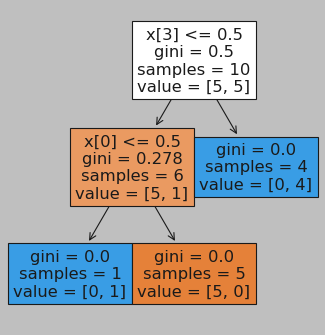

In [14]:
plt.figure(figsize=(5,5))
plot_tree(tree, filled=True);

In [15]:
# To see the splits
pd.concat([X, y], axis=1).head(2)

,Sex,Degree_Apprenticeship,Degree_Bachelor,Degree_Master,Salary Class
0,1,1.0,0.0,0.0,0
1,1,1.0,0.0,0.0,0


What is the depth of this tree?

In [16]:
tree.get_depth()

2

Have a look at the parameters of the `DecisionTreeClassifier` [sklearn documentation for this classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).

One can, for example limit the maximum depth of my tree with `max_depth` or set a minimum number of observations in each leaf with `min_samples_leaf`.

With sklearn, the default `criterion` for determining the split at each node is the Gini index. It is based on this criterion that the algorithm choses which feature and what condition on this feature to use to make the best split. [For more info you can read this Medium post](https://medium.com/analytics-steps/understanding-the-gini-index-and-information-gain-in-decision-trees-ab4720518ba8). 

## Drug Classification Example
We classify people into drug categories according to a set of individual characteristics (blood pressure, age, cholosterol, ...).

### Load Data

In [17]:
# Load dataset
df = pd.read_csv("drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


The variables:

* Age: Age of patient
* Sex: Gender of patient
* BP: Blood pressure of patient
* Cholesterol: Cholesterol of patient
* Na_to_K: Sodium to Potassium Ratio in Blood
* Drug: Drug Type

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


### Basic Data Analysis

In [19]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


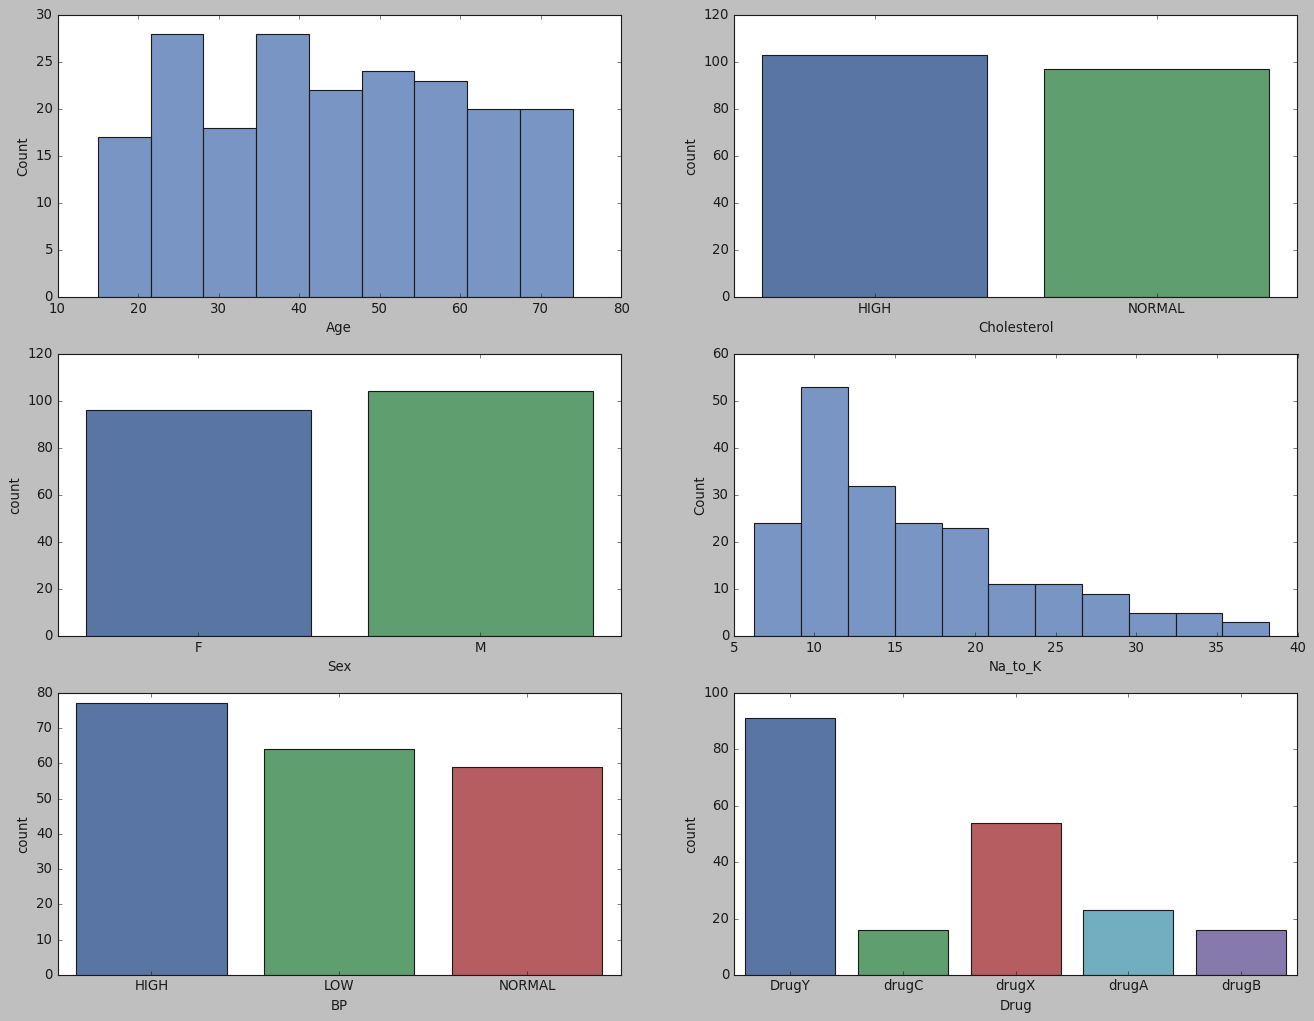

In [20]:
# Analysis of the data (univariate)
fig, ax = plt.subplots(3, 2, figsize=(20,15))
i = 0
j = 0
for var in df:
  if df[var].dtypes == "object":
    sns.countplot(x=df[var], ax=ax[i, j])
  else:
    sns.histplot(df[var], ax=ax[i, j])
  i += 1
  if i == 3:
    i = 0
    j += 1
plt.show()

Show the relative frequency of the different drug classes.

In [21]:
df.Drug.value_counts(normalize=True)

Drug
DrugY    0.455
drugX    0.270
drugA    0.115
drugC    0.080
drugB    0.080
Name: proportion, dtype: float64

Look into any dependencies between the target `Drug` and the numeric input features: `Age`-`Drug` and `Na_to_K`-`Drug`.

/Users/bogo/opt/anaconda3/envs/MachLe310/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x800 with 0 Axes>

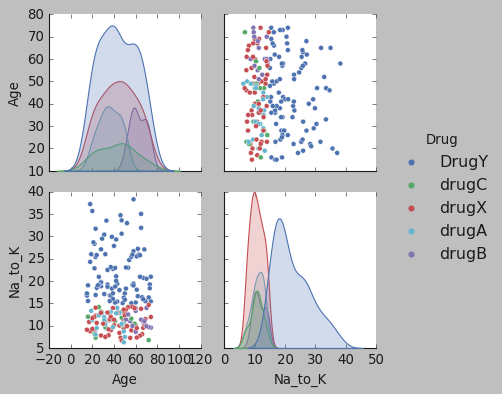

In [22]:
plt.figure(figsize=(10,10))
sns.pairplot(df, hue="Drug")

Look into any dependencies between the target `Drug` and the categorc input features: `Cholesterol`-`Drug` and `BP`-`Drug`.

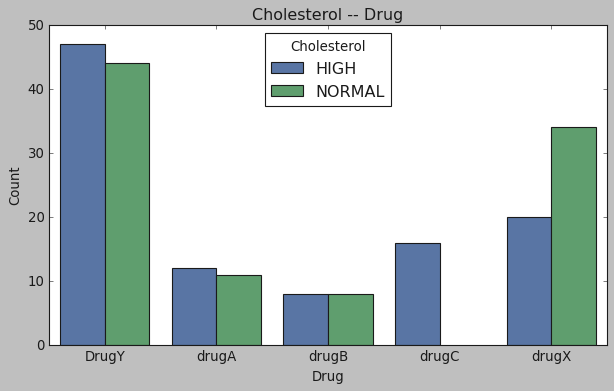

In [23]:
# Cholesterol-Drug
# Counts of the different combinations
df_CH_Drug = df.groupby(["Drug","Cholesterol"]).size().reset_index(name = "Count")

# Barplot of the counts
plt.figure(figsize = (9,5))
sns.barplot(x = "Drug",y="Count", hue = "Cholesterol",data = df_CH_Drug)
plt.title("Cholesterol -- Drug")
plt.show()


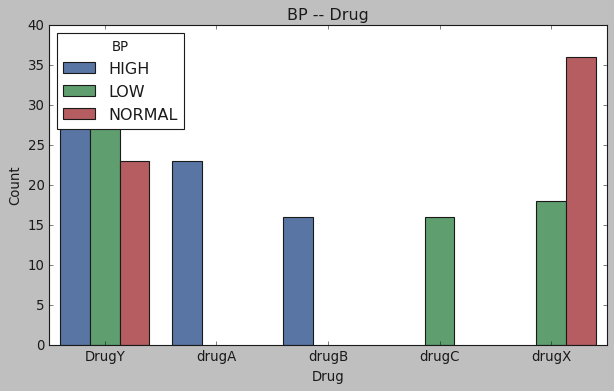

In [24]:
# Blood Pressure (BP) - Drug
# Counts of the different combinations
df_BP_Drug = df.groupby(["Drug","BP"]).size().reset_index(name = "Count")

# Barplot of the counts
plt.figure(figsize = (9,5))
sns.barplot(x = "Drug",y="Count", hue = "BP",data = df_BP_Drug)
plt.title("BP -- Drug")
plt.show()


We see that all people with a Na_to_K ratio above around 15 take DrugY. This will be useful for classification.

### Prepare data for the algorthm

In [25]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


Label encoding using [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html#sklearn.preprocessing.OrdinalEncoder) combined with [ColumnTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html) (both from sklearn).

In [26]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

# instantiate encoder
oe=OrdinalEncoder()
# select variables for label encoding
categorical_cols=['Sex', 'BP', 'Cholesterol', 'Drug']
# set up your preprocessor (name, transformer, columns to transform)
# remainder=passthrough means we keep the remaining features
preprocessor = ColumnTransformer([('categorical', oe, categorical_cols)], remainder='passthrough')
# fit pre-processor
encoded_df = pd.DataFrame(preprocessor.fit_transform(df), columns=['Sex', 'BP', 'Cholesterol', 'Drug', 'Age', 'Na_to_K'])

First, create the inputs and targets, then create the training and test splits.

In [27]:
# Create inputs X and target y
X = encoded_df.drop(["Drug"], axis=1)
y = encoded_df.Drug

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=72)
X_train

,Sex,BP,Cholesterol,Age,Na_to_K
90,1.0,2.0,0.0,62.0,16.594
163,0.0,0.0,1.0,21.0,28.632
76,0.0,0.0,0.0,36.0,11.198
113,0.0,1.0,1.0,65.0,13.769
98,1.0,0.0,1.0,20.0,35.639
...,...,...,...,...,...
69,0.0,0.0,1.0,18.0,24.276
101,0.0,0.0,0.0,45.0,12.854
74,1.0,0.0,1.0,31.0,17.069
46,0.0,0.0,0.0,37.0,13.091


Calculate the *base rate* using [DummyClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html) with the `most_frequent` strategy meaning assigning the most frequent class as prediction to all samples.

In [28]:
from sklearn.dummy import DummyClassifier

# instantiate with the "most frequent" parameter
dummy = DummyClassifier(strategy='most_frequent')

# fit it as if we had no X features to train it on
dummy.fit(None, y_train)

#compute test baseline and store it for later
baseline = dummy.score(None, y_test)
baseline

0.42857142857142855

### Decision Tree
Fit a decision tree model on the training set, use it to compute the predictions on the test set and finally evaluate the model by computing the accuracy score and plotting the confusion matrix. 

Accuracy score: 0.9714


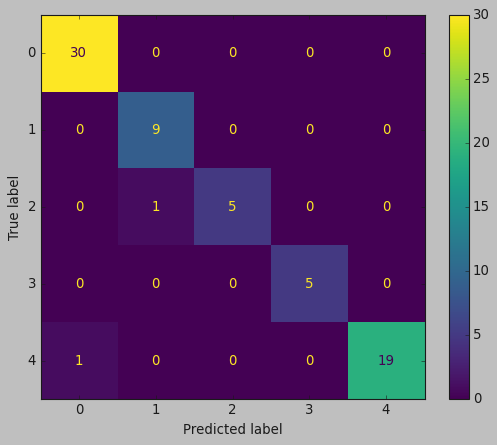

In [29]:
# Fit model
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

# Predict
y_pred = tree.predict(X_test)

# Evaluate model
def accuracy_conf_mat(y_test, y_pred):
  print("Accuracy score:", round(accuracy_score(y_test, y_pred), 4))
  conf_mat = confusion_matrix(y_test, y_pred)
  cm_display = ConfusionMatrixDisplay(conf_mat).plot()

accuracy_conf_mat(y_test, y_pred)

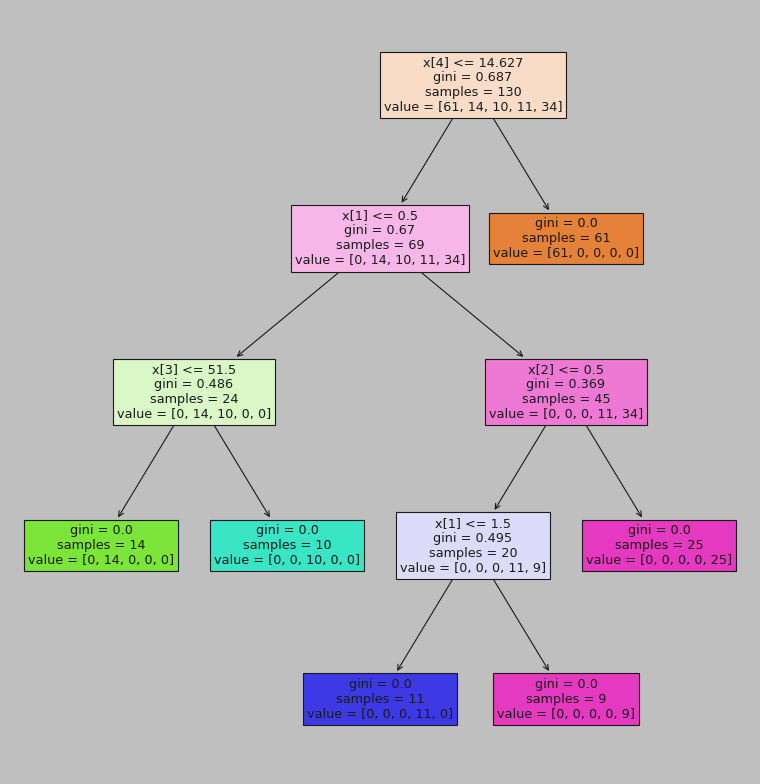

In [30]:
plt.figure(figsize=(12, 12))
plot_tree(tree, filled=True);

In [31]:
tree.get_depth()

4

In [32]:
# Accuracy in training set
tree.score(X_train, y_train)

1.0

In this simple example we are not in the case of overfitting here since we obtain high accuracy on the test data. With real life data, this is will probably never be the case... Let's try with different tree depths and look at the fitted trees.

Depth: 2
0.83


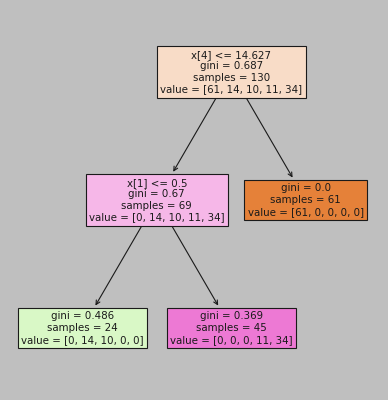






Depth: 3
0.81


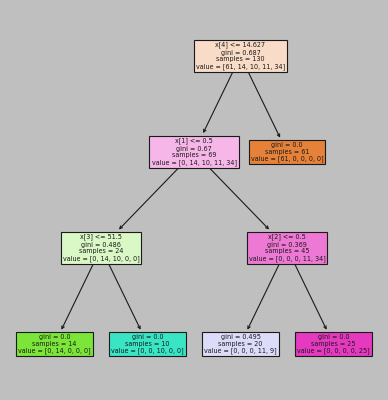






Depth: 4
0.97


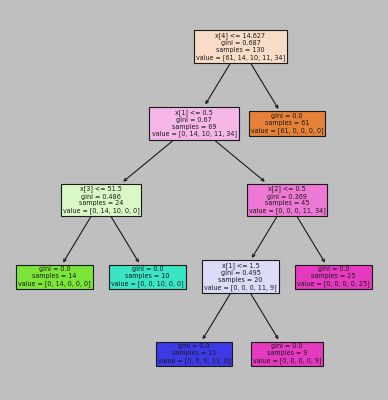






Depth: 5
0.97


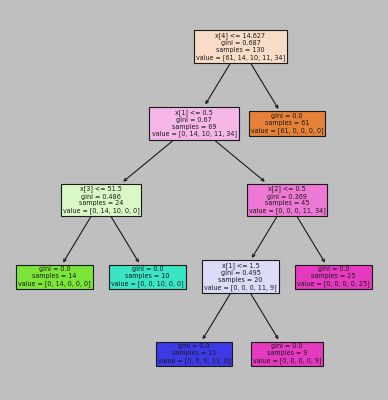

In [33]:
# Try out tree depths from 2 to 5
for depth in [2, 3, 4, 5]:
    tree = DecisionTreeClassifier(max_depth=depth).fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    print("Depth: " + str(depth))
    print(round(accuracy_score(y_test, y_pred), 2))
    plt.figure(figsize=(6, 6))
    plot_tree(tree, filled=True)
    plt.show()
    print("\n\n\n\n")

And this is how we can set up grid search to tune the optimal value of the maximum tree depth.

In [34]:
# Grid Search - tuning tree depth
from sklearn.model_selection import GridSearchCV

# Define parameter to test - max_depth from 1 to 6
grid = {'max_depth':np.arange(1,7)}

# Define and fit model
tree = DecisionTreeClassifier()
# Grid search CV with 5-fold cross validation
tree_cv = GridSearchCV(tree, grid, cv=5)
tree_cv.fit(X_train, y_train)

# Print results
print("Hyperparameters (best max_depth):", tree_cv.best_params_)
print("Training CV Accuracy Score:", round(tree_cv.best_score_, 4))
print("Test Accuracy Score:", round(tree_cv.score(X_test, y_test), 4))

Hyperparameters (best max_depth): {'max_depth': 4}
Training CV Accuracy Score: 0.9923
Test Accuracy Score: 0.9714


## Random Forest
Now we will train a random forest classifier on the same dataset and evaluate its performance.

Accuracy score: 1.0


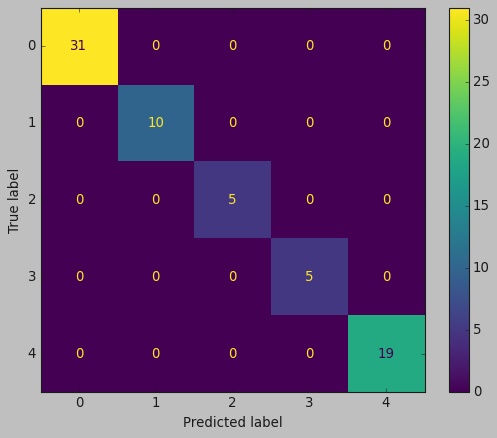

In [35]:
from sklearn.ensemble import RandomForestClassifier

# fit a random forest classfier
rfc = RandomForestClassifier(random_state = 42)
rfc.fit(X_train,y_train)

# Compute the predictions on the test set
y_test = rfc.predict(X_test)

# Evaluate Model
accuracy_conf_mat(y_test, y_pred)


We will use grid search to tune the hyperparameters `n_estimators` and `criterion` (splitting criterions for the decision trees) of the random forest classifier.

In [36]:
grid = {'n_estimators': np.arange(100,1000,100),
        'criterion': ['gini','entropy']
       }

rf = RandomForestClassifier(random_state=42)
rf_cv = GridSearchCV(rf, grid, cv=5)
rf_cv.fit(X_train,y_train)

print("Hyperparameters:", rf_cv.best_params_)
print("Training CV Accuracy Score:", rf_cv.best_score_)
print("Test Accuracy Score:", rf_cv.score(X_test,y_test))

Hyperparameters: {'criterion': 'gini', 'n_estimators': 100}
Training CV Accuracy Score: 0.9923076923076923
Test Accuracy Score: 1.0


## References:
https://www.kaggle.com/gorkemgunay/drug-classification-with-different-algorithms/notebook